# 1. 正态分布

2016年左右提出，对深度学习算法性能提升有效

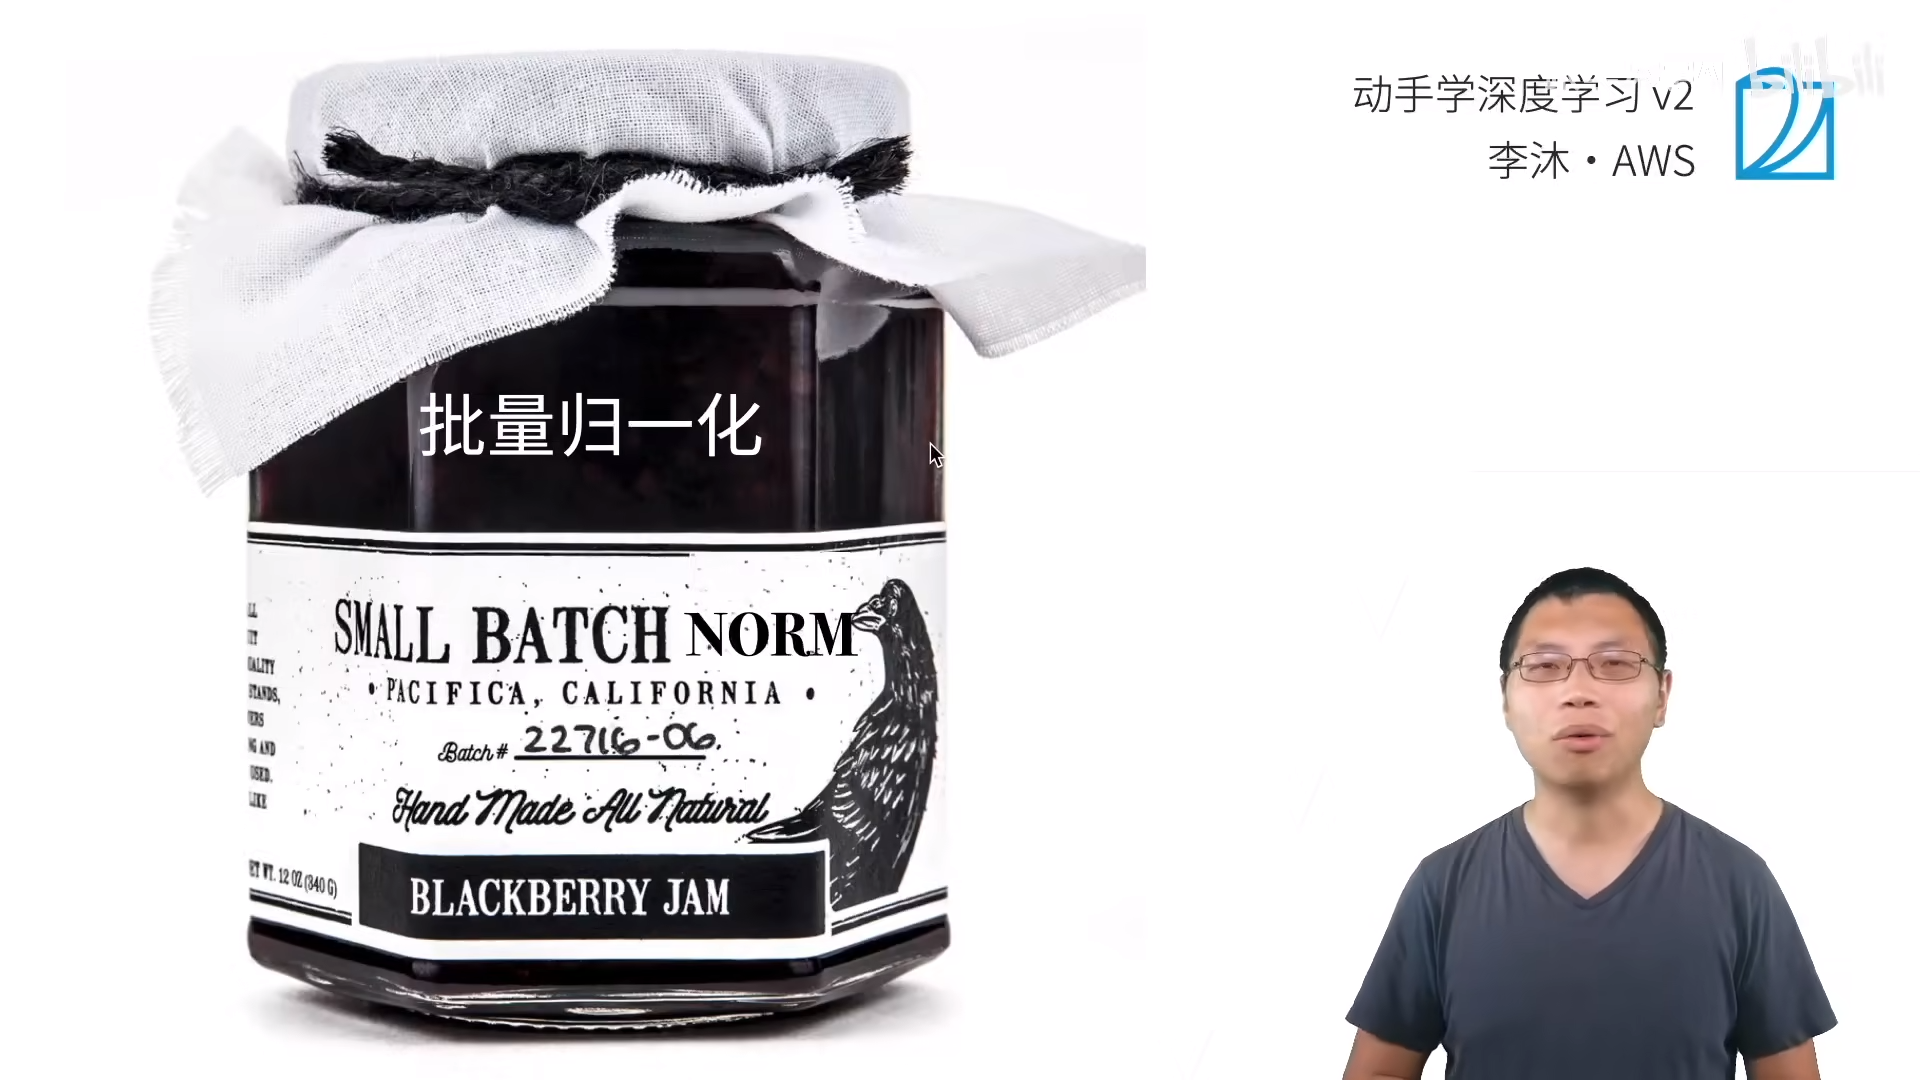

① 正态分布，又叫做高斯分布。

② 若随机变量$X$，服从一个位置参数为$\mu$、尺度参数为$\sigma$的概率分布，且其概率密度函数为：

$f(x)=\frac{1}{\sigma\sqrt{2 \pi} } e^{- \frac{{(x-\mu)^2}}{2\sigma^2}} \tag{1}$

③ 则这个随机变量就称为正态随机变量，正态随机变量服从的分布就称为正态分布，记作：

$X \sim N(\mu,\sigma^2) \tag{2}$

④ 当μ=0,σ=1时，称为标准正态分布：
$X \sim N(0,1) \tag{3}$

⑤ 此时公式简化为：
$f(x)=\frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}} \tag{4}$

⑥ 下图是三种$（\mu,\sigma）$组合的函数图像。
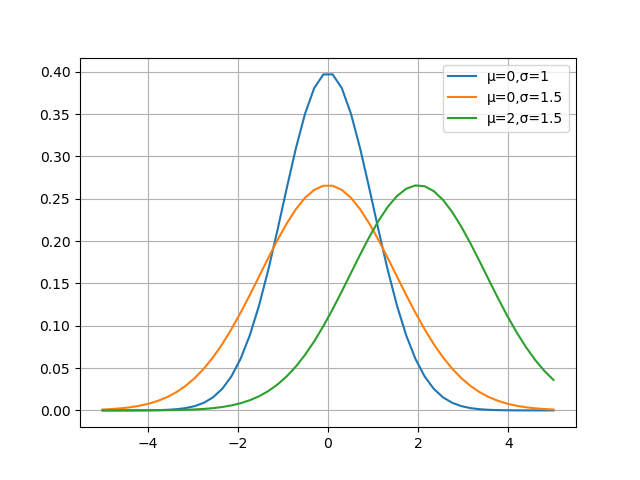

# 2. 每层数据分布

① 机器学习领域有个很重要的假设：I.I.D.（独立同分布）假设，就是假设训练数据和测试数据是满足相同分布的，这样就能做到通过训练数据获得的模型能够在测试集获得好的效果。

② 在深度神经网络中，我们可以将每一层视为对输入的信号做了一次变换：
$Z = W \cdot X + B \tag{5}$

③ 输入层的数据如果不做归一化，很多时候甚至网络不会收敛，可见归一化的重要性。

④ 随后的网络的每一层的输入数据在经过公式5的运算后，其分布一直在发生变化，前面层训练参数的更新将导致后面层输入数据分布的变化，必然会引起后面每一层输入数据分布的改变，不再是输入的原始数据所适应的分布了。

⑤ 而且，网络前面几层微小的改变，后面几层就会逐步把这种改变累积放大。训练过程中网络中间层数据分布的改变称之为内部协变量偏移（Internal Covariate Shift）。BN的提出，就是要解决在训练过程中，中间层数据分布发生改变的情况。

① 比如，在上图中，假设X是服从蓝色或红色曲线的分布，经过公式5后，有可能变成了绿色曲线的分布。

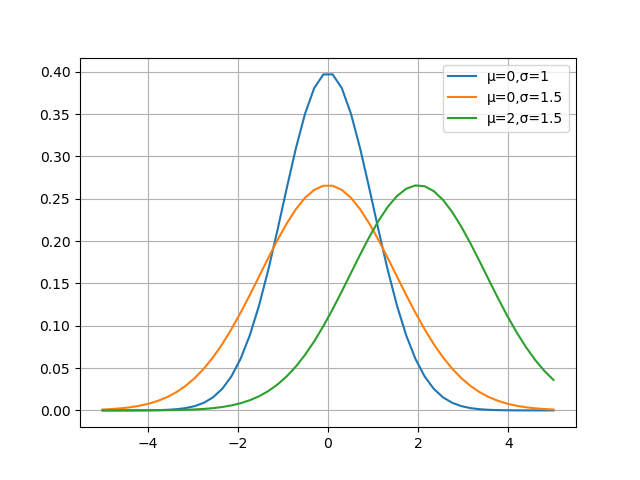

② 标准正态分布的数值密度占比如下图所示。

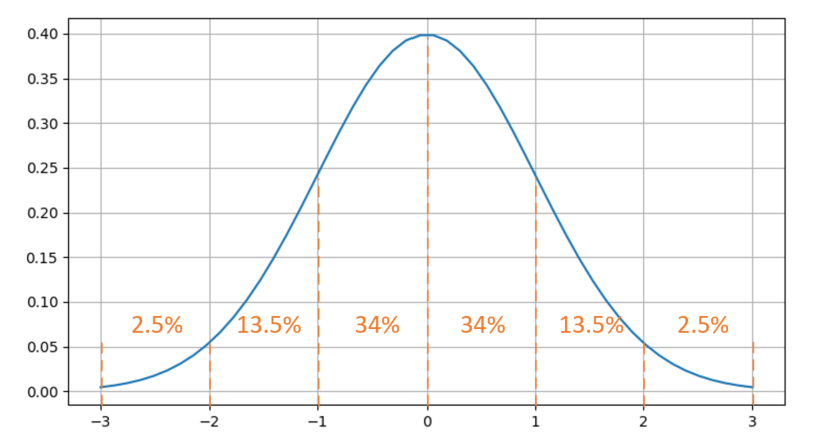

③ 有68%的值落在[-1,1]之间，有95%的值落在[-2,2]之间。

① 比较一下偏移后的数据分布区域和Sigmoid激活函数的图像，如下图所示。

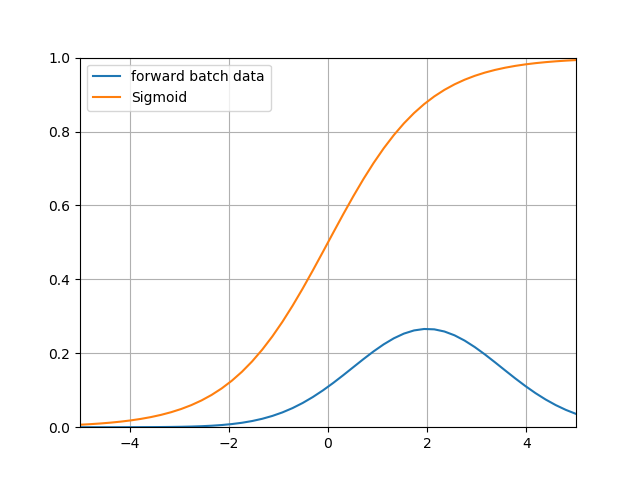

② 可以看到带来的问题是：

1. 在大于2的区域，激活后的值基本接近1了，饱和输出。如果蓝色曲线表示的数据更偏向右侧的话，激活函数就会失去了作用，因为所有的输出值都是0.94、0.95、0.98这样子的数值，区别不大；
2. 导数数值小，只有不到0.1甚至更小，反向传播的力度很小，网络很难收敛。

① 我们在深度学习中不是都用ReLU激活函数吗？那么BN对于ReLU有用吗？下面我们看看ReLU函数的图像，如下图所示。
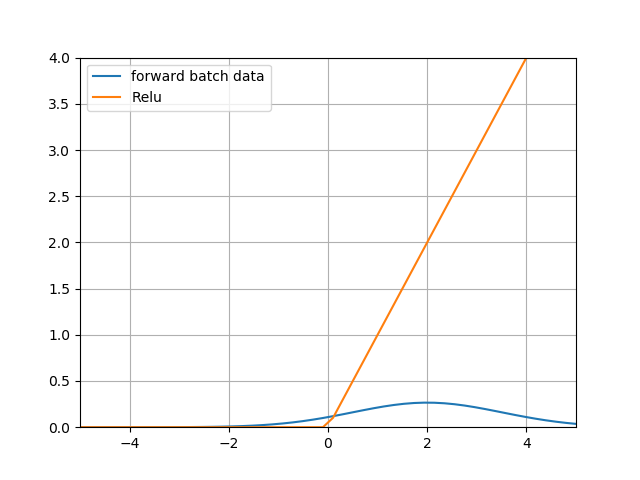

② 上图中蓝色为数据分布，已经从0点向右偏移了，黄色为ReLU的激活值，可以看到95%以上的数据都在大于0的区域，从而被Relu激活函数原封不动第传到了下一层网络中，而没有被小于0的部分剪裁，那么这个网络和线性网络也差不多了，失去了深层网络的能力。

# 3. 批量归一化

① 既然可以把原始训练样本做归一化，那么如果在深度神经网络的每一层，都可以有类似的手段，也就是说把层之间传递的数据移到0点附近，那么训练效果就应该会很理想。这就是批归一化BN的想法的来源。

② 深度神经网络随着网络深度加深，训练起来越困难，收敛越来越慢，这是个在DL领域很接近本质的问题。很多论文都是解决这个问题的，比如ReLU激活函数，再比如Residual Network。BN本质上也是解释并从某个不同的角度来解决这个问题的。

③ BN就是在深度神经网络训练过程中使得每一层神经网络的输入保持相同的分布，致力于将每一层的输入数据正则化成的分布。因次，每次训练的数据必须是mini-batch形式，一般取32，64等数值。

④ 具体的数据处理过程如下图所示。
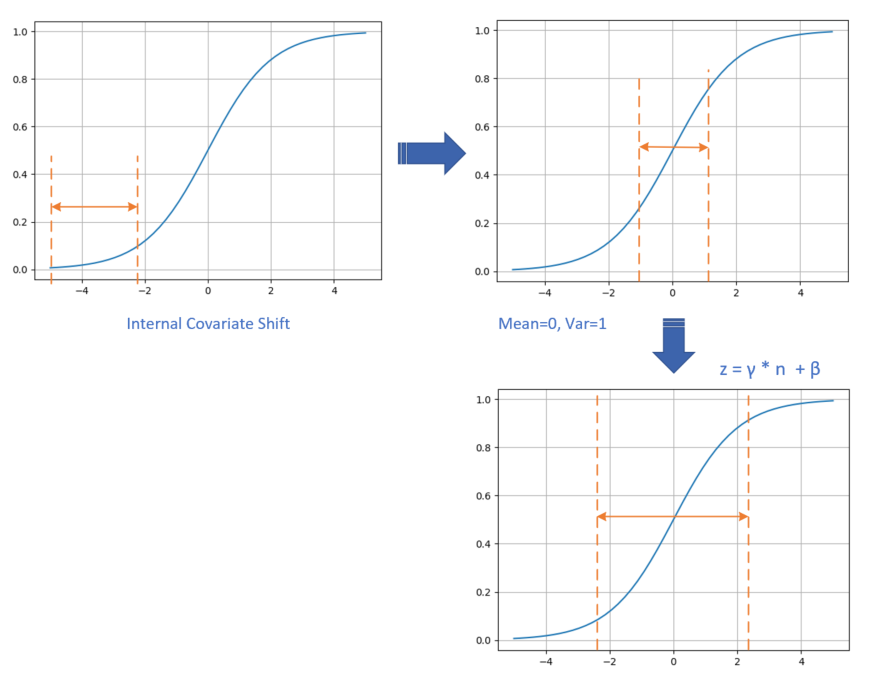

① 数据在训练过程中，在网络的某一层会发生Internal Covariate Shift，导致将数据处于激活函数的饱和区；

② 经过均值为0、方差为1的变换后，位移到了0点附近。但是只做到这一步的话，会带来两个问题：
1. 在[-1,1]这个区域，Sigmoid激活函数是近似线性的，造成激活函数失去非线性的作用；
2. 在二分类问题中我们学习过，神经网络把正类样本点推向了右侧，把负类样本点推向了左侧，如果再把它们强行向中间集中的话，那么前面学习到的成果就会被破坏；

③ 经过$\gamma,\beta$的线性变换后，把数据区域拉宽，则激活函数的输出既有线性的部分，也有非线性的部分，这就解决了问题a；而且由于$\gamma,\beta$也是通过网络进行学习的，所以以前学到的成果也会保持，这就解决了问题b。

④ 在实际的工程中，我们把BN当作一个层来看待，一般架设在全连接层（或卷积层）与激活函数层之间。

# 1. 批量归一化

## 批量归一化

### 形象理解

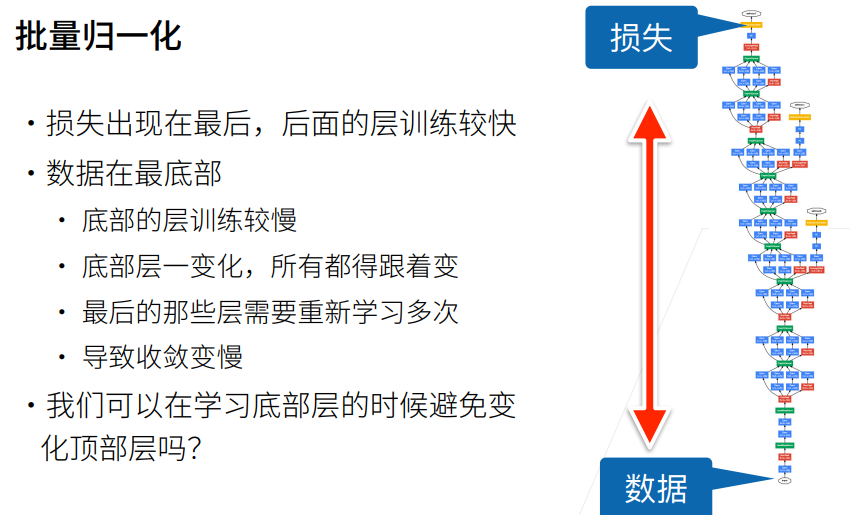

### 公式解释

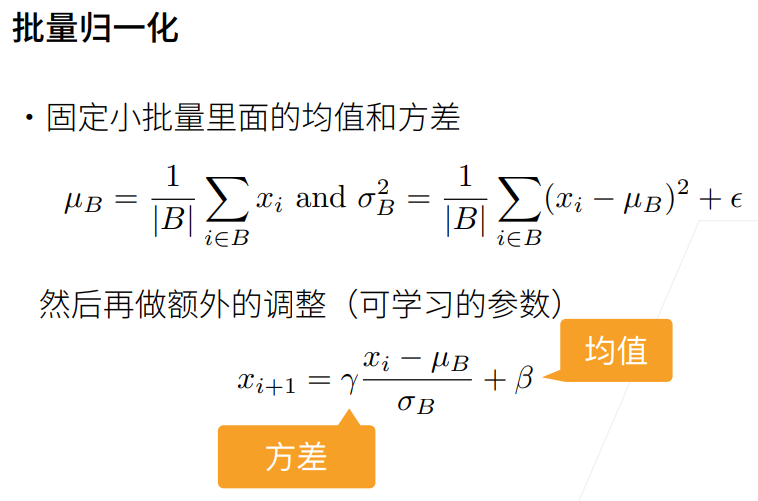

* $γ$和$β$是可以学习来的

## 批量归一化层

① 在每个批量里，1个像素是1个样本。与像素（样本）对应的通道维，就是特征维。

② 所以不是对单个通道的特征图做均值方差，是对单个像素的不同通道做均值方差。

③ 输入9个像素(3x3), 输出3通道，以通道作为列分量，每个像素都对应3列(输出通道=3)，可以列出表格，按列求均值和方差，其实和全连接层一样的。即像素为样本，通道为特征。

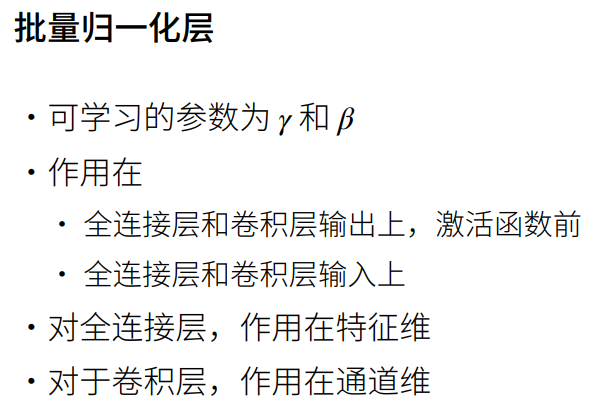

## 批量归一化在做什么

① 这个小批量数据实随机的，算出来的统计量也可以说是随机的。

② 因为每个batch的均值和方差都不太一样。

③ 因为每次取得batch中的数据都是不同的，所以在batch中计算的均值和方差也是不同的，所以引入了随机性。

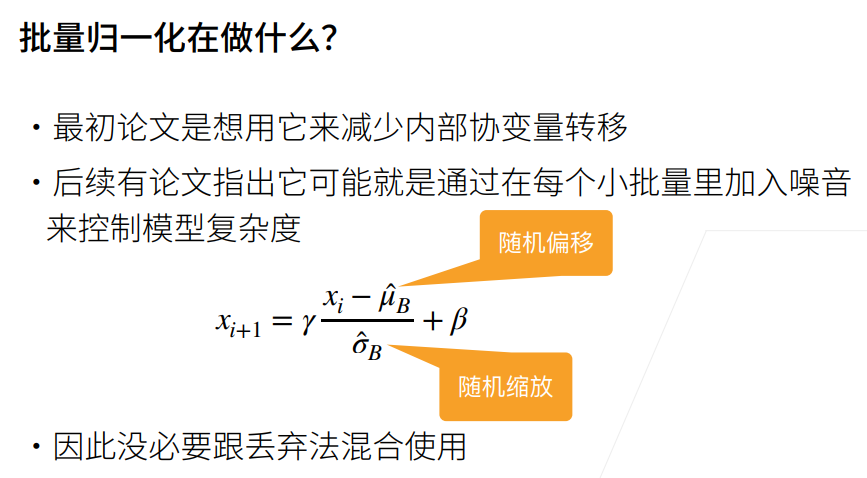

# 2. 总结

① 当每一个层的均值和方差都固定后，学习率太大的话，靠近loss上面的梯度太大，就梯度爆炸了，学习率太小的话，靠近数据的梯度太小了，就算不动（梯度消失）。

② 将每一层的输入放在一个差不多的分布里，就可以用一个比较大的精度了，就可以加速收敛速度。

③ 归一化不会影响数据分布，它一点都不会影响精度，变好变坏都不会。

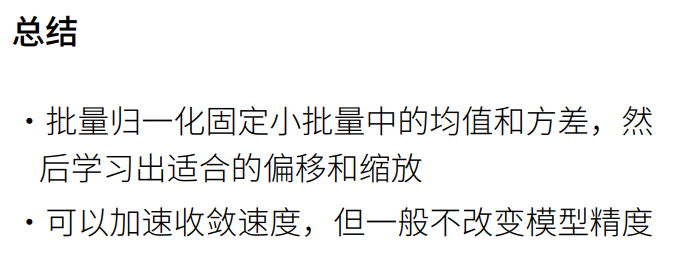

# 1. 批量归一化（使用自定义）

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def batch_norm(X,gamma,beta,moving_mean,moving_var,eps,momentum): # X为输入参，gamma、beta为学的数。moving_mean、moving_var为全局【整个数据集上的】的均值、方差【推理用】。eps为避免除0的参数【不要改】。momentum为更新moving_mean、moving_var的【不要改】。                
    if not torch.is_grad_enabled(): # 'is_grad_enabled' 来判断当前模式是训练模式还是预测模式。就是在做推理的时候，推理不需要反向传播，所以不需要计算梯度    
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps) # 做推理时，可能只有一个图片进来，没有一个批量进来，因此这里用的全局的均值、方差。在预测中，一般用整个预测数据集的均值和方差。加eps为了避免方差为0，除以0了。       
    else: # 训练模式
        assert len(X.shape) in (2,4) # 批量数+通道数+图片高+图片宽=4
        if len(X.shape) == 2:  # 2 表示2表示有两个维度，样本和特征，表示全连接层应该是：2 代表全连接层 (batch_size, feature)
            mean = X.mean(dim=0) # 按行求均值，即对每一列求一个均值出来。mean为1Xn的行向量   
            var = ((X-mean)**2).mean(dim=0) # 方差也是行向量
        else: # 4 表示卷积层
            mean = X.mean(dim=(0,2,3),keepdim=True) # 0为批量大小，1为输出通道，2、3为高宽。这里是沿着通道维度求均值，0->batch内不同样本，2 3 ->同一通道层的所有值求均值，获得一个1xnx1x1的4D向量。       
            var = ((X-mean)**2).mean(dim=(0,2,3),keepdim=True) # 同样对批量维度、高宽取方差。每个通道的每个像素位置 计算均值方差。
        X_hat = (X-mean) / torch.sqrt(var + eps) # 训练用的计算出来的均值、方差，推理用的全局的均值、方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean # 累加，将计算的均值累积到全局的均值上，更新moving_mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var # 当前全局的方差与当前算的方差做加权平均，最后会无限逼近真实的方差。仅训练时更新，推理时不更新。          
    Y = gamma * X_hat + beta # Y 为归一化后的输出
    return Y, moving_mean.data, moving_var.data

In [8]:
# 创建一个正确的BatchNorm图层
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):  # num_dims为2或者4
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features) # num_features 为 feature map 的多少，即通道数的多少  
        else:
            shape = (1, num_features,1,1)
        self.gamma = nn.Parameter(torch.ones(shape)) # 伽马初始化为全1，贝塔初始化为全0
        self.beta = nn.Parameter(torch.zeros(shape)) # 伽马为要拟合的均值，贝塔为要拟合的方差
        self.moving_mean = torch.zeros(shape) # 伽马、贝塔需要在反向传播时更新，所以放在nn.Parameter里面，moving_mean、moving_var不需要迭代，所以不放在里面      
        self.moving_var = torch.ones(shape)
        
    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device) # 
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta,self.moving_mean,self.moving_var,
            eps=1e-5,momentum=0.9)  # 每个框架不同eps=1e-5,momentum=0.9
        return Y

In [3]:
# 应用BatchNorm于LeNet模型
net = nn.Sequential(nn.Conv2d(1,6,kernel_size=5),BatchNorm(6,num_dims=4), # 在第一个卷积后面加了BatchNorm                       
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),
                   nn.Conv2d(6,16,kernel_size=5),BatchNorm(16,num_dims=4), # BatchNorm的feature map为卷积层的输出通道数。这里BatchNorm加在激活函数前面。      
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),      
                   nn.Flatten(),nn.Linear(16*4*4,120),
                   BatchNorm(120,num_dims=2),nn.Sigmoid(),
                   nn.Linear(120,84),BatchNorm(84,num_dims=2),
                   nn.Sigmoid(),nn.Linear(84,10))   

loss 0.172, train acc 0.936, test acc 0.862
28911.7 examples/sec on cuda:0


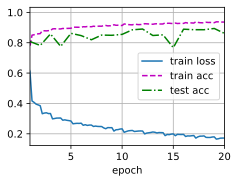

In [9]:
# 在Fashion-MNIST数据集上训练网络
lr,num_epochs,batch_size = 0.9, 20, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())  # 变快是指收敛所需的迭代步数变少了，但每次迭代计算量更大了呀，所以从时间上来讲跑得慢了   

In [5]:
# 拉伸参数gamma和偏移参数beta
net[1].gamma.reshape((-1,)), net[1].beta.reshape((-1,))

(tensor([2.2886, 1.7434, 0.8706, 2.2009, 1.5512, 2.6003], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([ 1.1376, -0.6415, -0.4456,  0.6269, -0.5659, -2.6670], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>))

# 2. 批量归一化（使用框架）

In [6]:
# 简洁使用
net = nn.Sequential(nn.Conv2d(1,6,kernel_size=5),nn.BatchNorm2d(6),
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),
                   nn.Conv2d(6,16,kernel_size=5),nn.BatchNorm2d(16),
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),
                   nn.Flatten(),nn.Linear(256,120),nn.BatchNorm1d(120),
                   nn.Sigmoid(),nn.Linear(120,84),nn.BatchNorm1d(84),
                   nn.Sigmoid(),nn.Linear(84,10))

loss 0.246, train acc 0.910, test acc 0.720
28635.5 examples/sec on cuda:0


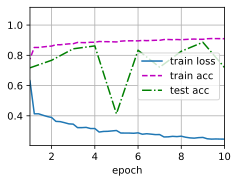

In [7]:
# 使用相同超参数来训练模型
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())